In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Load data

In [ ]:
(train_data,train_labels),(test_data,test_labels) = tf.keras.datasets.mnist.load_data()

##Check data

**We need to change dtype of train_data and train_labels
as well change shape of train_labels**

In [ ]:
train_data.shape, train_data.dtype, type(train_data)

((60000, 28, 28), dtype('uint8'), numpy.ndarray)

In [ ]:
train_labels.shape, train_labels.dtype, type(train_labels)

((60000,), dtype('uint8'), numpy.ndarray)

##Example of data

In [ ]:
train_labels[-1]

8

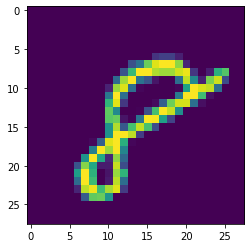

In [ ]:
plt.imshow(train_data[-1])

#One hot labels

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_cat_labels = to_categorical(train_labels, num_classes=10, dtype='float32')

In [ ]:
test_cat_labels = to_categorical(test_labels, num_classes=10, dtype='float32')

check outputs of one hot

In [ ]:
train_cat_labels[-100]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
test_cat_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Normalize and Reshape

In [ ]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [ ]:
train_data.dtype,test_data.dtype

(dtype('float32'), dtype('float32'))

In [ ]:
train_data.max(),train_data.min()

(255.0, 0.0)

In [ ]:
train_data = train_data/255
test_data = test_data/255

In [ ]:
train_data.max(), train_data.min()

(1.0, 0.0)

**Notice:(None = batch_size)**

**CNN: Input= (None, Height, Width, Channel),  Outputs= (None, num_class)**

In [ ]:
train_data = np.reshape(train_data, (-1, 28, 28, 1))
train_data.shape

(60000, 28, 28, 1)

In [ ]:
test_data = np.reshape(test_data, (-1, 28, 28, 1))
test_data.shape

(10000, 28, 28, 1)

#Create model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, ReLU, MaxPool2D, Flatten, Dropout

In [ ]:
i = Input(shape=(28, 28, 1))
#block1
x = Conv2D(filters=16, kernel_size=(5,5), padding='same', name= 'block1')(i)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(x) 
#block2
x = Conv2D(filters=32, kernel_size=(3,3), padding='valid', name= 'block2')(x)
x = ReLU()(x)
x = MaxPool2D(pool_size=(2,2), strides=2, padding='valid')(x)
#Flatten
x = Flatten()(x)
#Fully Connected Network
x = Dense(units=128,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(units=32,activation='relu')(x)
x = Dropout(0.2)(x)
prediction = Dense(units=10, activation='softmax')(x)

classification_model = Model(inputs=i, outputs=prediction)

In [ ]:
classification_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
block1 (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
re_lu_7 (ReLU)               (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
block2 (Conv2D)              (None, 12, 12, 32)        4640      
_________________________________________________________________
re_lu_8 (ReLU)               (None, 12, 12, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0   

#Compile model

**Classification: loss=categorical_crossentropy, output_layer=softmax**

**Multi_class: loss=binary_crossentropy, output_layer=sigmoid**

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
classification_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
my_earlystop = EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=True)

#Fit model

##Check data

In [ ]:
train_data.shape, train_data.dtype, type(train_data)

((60000, 28, 28, 1), dtype('float32'), numpy.ndarray)

In [ ]:
train_cat_labels.shape,train_cat_labels.dtype,type(train_cat_labels)

((60000, 10), dtype('float32'), numpy.ndarray)

In [ ]:
test_data.shape, test_data.dtype, type(test_data)

((10000, 28, 28, 1), dtype('float32'), numpy.ndarray)

In [ ]:
test_cat_labels.shape,test_cat_labels.dtype,type(test_cat_labels)

((10000, 10), dtype('float32'), numpy.ndarray)

##Fit data to model

In [ ]:
classification_model.fit(x=train_data, y=train_cat_labels, batch_size=32, epochs=40, verbose=1, callbacks=my_earlystop, validation_split=0.2)

Epoch 1/40
1500/1500 [==============================] - 9s 6ms/step - loss: 0.5784 - accuracy: 0.8101 - val_loss: 0.0668 - val_accuracy: 0.9801
Epoch 2/40
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0964 - accuracy: 0.9726 - val_loss: 0.0460 - val_accuracy: 0.9853
Epoch 3/40
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0641 - accuracy: 0.9814 - val_loss: 0.0498 - val_accuracy: 0.9855
Epoch 4/40
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0519 - accuracy: 0.9850 - val_loss: 0.0418 - val_accuracy: 0.9873
Epoch 5/40
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0445 - accuracy: 0.9872 - val_loss: 0.0405 - val_accuracy: 0.9889
Epoch 6/40
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0373 - accuracy: 0.9887 - val_loss: 0.0390 - val_accuracy: 0.9897
Epoch 7/40
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0310 - accuracy: 0.9913 - val_loss: 0.0365 - val_accuracy:

#Evaluate model

##Plot history

In [ ]:
model_history = pd.DataFrame(classification_model.history.history)

In [ ]:
model_history

,loss,accuracy,val_loss,val_accuracy
0,0.279388,0.913458,0.066771,0.980083
1,0.090156,0.975479,0.046006,0.985333
2,0.063723,0.981687,0.049766,0.985500
3,0.051080,0.985000,0.041850,0.987333
4,0.044635,0.987042,0.040466,0.988917
5,0.037575,0.988729,0.038983,0.989667
6,0.033150,0.990479,0.036461,0.990750
7,0.026319,0.992625,0.044152,0.988333
8,0.025356,0.992625,0.037997,0.991083
9,0.022247,0.993354,0.047607,0.990417


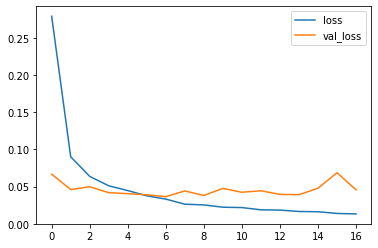

In [ ]:
model_history[['loss','val_loss']].plot()

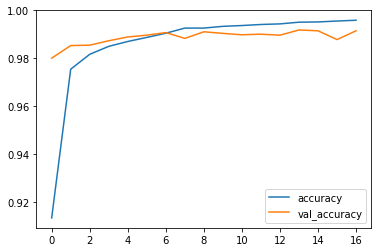

In [ ]:
model_history[['accuracy','val_accuracy']].plot()

##Evaluate

In [ ]:
min(model_history['val_loss'])

0.03646068647503853

In [ ]:
classification_model.evaluate(x=test_data, y=test_cat_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0301 - accuracy: 0.9915


[0.030089465901255608, 0.9915000200271606]

#Report

##Prediction

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model_prediction = classification_model.predict(test_data)

In [ ]:
model_prediction[-1]

array([9.50812975e-08, 2.03825859e-10, 4.45203978e-11, 9.95903157e-17,
       1.73307910e-08, 1.16932535e-08, 9.99999881e-01, 4.23922965e-15,
       6.46926235e-10, 2.90719770e-12], dtype=float32)

In [ ]:
test_labels[-1]

6

##Confusion_matrix and Classification_reports

**Notice: Input of classification_reports and confusion_matrix is not one-Hot**

In [ ]:
test_labels.shape

(10000,)

In [ ]:
model_sparse_prediction = np.zeros((test_labels.shape))

In [ ]:
model_sparse_prediction = np.argmax(model_prediction,axis=1)

**Check**

In [ ]:
model_sparse_prediction[-1]

6

In [ ]:
model_prediction[-1]

array([9.50812975e-08, 2.03825859e-10, 4.45203978e-11, 9.95903157e-17,
       1.73307910e-08, 1.16932535e-08, 9.99999881e-01, 4.23922965e-15,
       6.46926235e-10, 2.90719770e-12], dtype=float32)

In [ ]:
test_labels[-1]

6

**Classification reports and Confusion Matrix**

**Notice: Input of classification_reports and confusion_matrix is not one-Hot**

In [ ]:
print(classification_report(y_true=test_labels, y_pred=model_sparse_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Use confusion matrix**

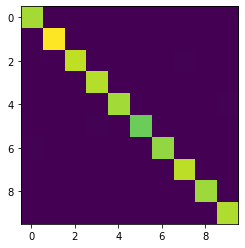

In [ ]:
confusion_matrix(y_true=test_labels, y_pred=model_sparse_prediction)

#Predict single image

In [ ]:
classification_model.predict(np.reshape(test_data[0],(1, 28, 28, 1))).argmax()

7

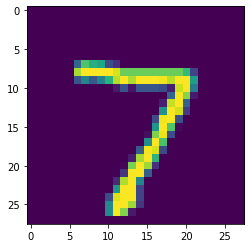

In [ ]:
plt.imshow(test_data[0].reshape(28,28))